# Ejercicio 3

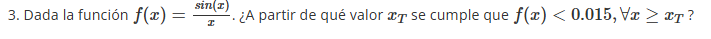

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 20971520  # 20MB

# Definir la función f(x) = sin(x)/x
def f(x):
    return np.sin(x) / x

# Derivada de la función f(x)
def df(x):
    return (x * np.cos(x) - np.sin(x)) / (x**2)

# Función para resolver f(x) = 0.015
def g(x):
    return f(x) - 0.015

# Derivada de g(x)
def dg(x):
    return df(x)

# Implementación del método de Newton
def newton_method(fun, dfun, x0, tol=1e-8, max_iter=100):
    iterations = []
    x = x0
    
    for i in range(max_iter):
        iterations.append(x)
        fx = fun(x)
        
        if abs(fx) < tol:
            break
            
        dfx = dfun(x)
        if abs(dfx) < 1e-10:  # Evitar división por un número muy pequeño
            break
            
        x_new = x - fx / dfx
        
        # Agrega un punto intermedio para visualizar la tangente
        iterations.append((x, x_new, fx, dfx))
        
        x = x_new
        
        # Si la convergencia es muy lenta, se puede agregar un criterio adicional
        if i > 0 and abs(iterations[-2] - x) < tol:
            break
        
    return iterations

# Valores iniciales y configuración
x_initial = 50  # Valor inicial para el método de Newton
target_value = 0.015  # Buscamos donde f(x) < 0.015

# Ejecutar el método de Newton
newton_iterations = newton_method(g, dg, x_initial)

# Extraer los valores de x (solo los puntos reales, no los intermedios)
x_values = [x for x in newton_iterations if not isinstance(x, tuple)]
x_T = x_values[-1]  # El último valor es nuestra solución

# Crear datos para graficar
x_vals = np.linspace(1, 100, 1000)
f_vals = f(x_vals)
threshold = np.ones_like(x_vals) * target_value

# Configuración de la figura
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Gráfico principal
ax1 = plt.subplot(gs[0])
ax1.plot(x_vals, f_vals, 'b-', linewidth=2, label=r'$f(x) = \frac{\sin(x)}{x}$')
ax1.axhline(y=target_value, color='r', linestyle='--', linewidth=2, label=r'$y = 0.015$')
ax1.grid(True, alpha=0.3)
ax1.set_title(f'Método de Newton para encontrar $x_T$ tal que $f(x) < 0.015$ para todo $x \geq x_T$', fontsize=14)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.set_xlim(0, 100)
ax1.set_ylim(-0.05, 0.3)
ax1.legend(fontsize=10)

# Iniciar elementos para animación
point, = ax1.plot([], [], 'ro', markersize=8)
tangent_line, = ax1.plot([], [], 'g-', linewidth=2, alpha=0.7)
text = ax1.text(0.05, 0.95, '', transform=ax1.transAxes, fontsize=12, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# Gráfico zoom para la solución
ax2 = plt.subplot(gs[1])
zoom_range = 5.0  # Rango para el zoom
x_zoom = np.linspace(max(1, x_T - zoom_range), x_T + zoom_range, 500)
ax2.plot(x_zoom, f(x_zoom), 'b-', linewidth=2)
ax2.axhline(y=target_value, color='r', linestyle='--', linewidth=2)
ax2.grid(True, alpha=0.3)
ax2.set_title('Vista ampliada cerca de la solución', fontsize=12)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('f(x)', fontsize=12)

# Elementos para el gráfico de zoom
zoom_point, = ax2.plot([], [], 'ro', markersize=8)
zoom_tangent, = ax2.plot([], [], 'g-', linewidth=2, alpha=0.7)

# Función para dibujar la línea tangente
def get_tangent_line(x, fx, dfx, width=20):
    # Genera puntos para la línea tangente centrada en x
    x_tangent = np.linspace(x - width/2, x + width/2, 100)
    y_tangent = fx + dfx * (x_tangent - x)
    return x_tangent, y_tangent

# Función de inicialización para la animación
def init():
    point.set_data([], [])
    tangent_line.set_data([], [])
    zoom_point.set_data([], [])
    zoom_tangent.set_data([], [])
    text.set_text('')
    return point, tangent_line, zoom_point, zoom_tangent, text

# Función de actualización para la animación
def update(frame):
    if frame < len(newton_iterations):
        data = newton_iterations[frame]
        
        if isinstance(data, tuple):
            # Es un punto intermedio que muestra la tangente
            x, x_next, fx, dfx = data
            
            # Dibujar la línea tangente
            x_t, y_t = get_tangent_line(x, fx + target_value, dfx, width=30)
            tangent_line.set_data(x_t, y_t)
            zoom_x_t, zoom_y_t = get_tangent_line(x, fx + target_value, dfx, width=10)
            zoom_tangent.set_data(zoom_x_t, zoom_y_t)
            
            # Mostrar el punto actual y la intersección con el eje x
            point.set_data([x, x_next], [fx + target_value, target_value])
            zoom_point.set_data([x, x_next], [fx + target_value, target_value])
            
            # Actualizar texto
            info_text = f'Iteración: {frame//2 + 1}\n'
            info_text += f'x_n = {x:.6f}\n'
            info_text += f'f(x_n) = {(fx + target_value):.6f}\n'
            info_text += f'f\'(x_n) = {dfx:.6f}\n'
            info_text += f'x_{{n+1}} = {x_next:.6f}'
            text.set_text(info_text)
            
            # Ajustar los límites del gráfico de zoom
            zoom_center = (x + x_next) / 2
            ax2.set_xlim(zoom_center - zoom_range/2, zoom_center + zoom_range/2)
            ax2.set_ylim(target_value - 0.01, target_value + 0.025)
            
        else:
            # Es solo un punto x
            x = data
            y = f(x)
            
            # En este caso, solo mostramos el punto
            point.set_data([x], [y])
            tangent_line.set_data([], [])
            
            zoom_point.set_data([x], [y])
            zoom_tangent.set_data([], [])
            
            # No actualizamos el texto aquí, se actualizará en el siguiente frame con la tangente
    
    else:
        # Mostrar el resultado final
        x = x_T
        y = f(x)
        
        point.set_data([x], [y])
        tangent_line.set_data([], [])
        
        zoom_point.set_data([x], [y])
        zoom_tangent.set_data([], [])
        
        info_text = f'RESULTADO FINAL:\n'
        info_text += f'x_T = {x:.6f}\n'
        info_text += f'f(x_T) = {y:.6f}\n'
        info_text += f'Para todo x ≥ {x:.6f}, f(x) < 0.015'
        text.set_text(info_text)
    
    return point, tangent_line, zoom_point, zoom_tangent, text

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(newton_iterations) + 20,
                   init_func=init, blit=True, interval=800)

# Guardar la animación como GIF
print("Guardando animación como GIF...")
try:
    # Primero intentamos con PillowWriter (más común)
    ani.save('newton_method_animation.gif', writer='pillow', fps=2, dpi=100)
    print("Animación guardada como 'newton_method_animation.gif' en el directorio actual")
except Exception as e:
    print(f"Error al guardar con PillowWriter: {e}")
    try:
        # Si falla, intentamos con ImageMagick
        ani.save('newton_method_animation.gif', writer='imagemagick', fps=2, dpi=100)
        print("Animación guardada como 'newton_method_animation.gif' en el directorio actual usando ImageMagick")
    except Exception as e:
        print(f"Error al guardar con ImageMagick: {e}")
        print("Intentando un método alternativo...")
        try:
            # Método alternativo para entornos donde los writer anteriores no están disponibles
            from matplotlib.animation import PillowWriter
            writer = PillowWriter(fps=2)
            ani.save('newton_method_animation.gif', writer=writer)
            print("Animación guardada como 'newton_method_animation.gif' en el directorio actual")
        except Exception as e:
            print(f"No se pudo guardar la animación como GIF: {e}")
            print("Es posible que necesites instalar 'pillow' o 'imagemagick':")
            print("pip install pillow")
            print("o instalar ImageMagick: https://imagemagick.org/script/download.php")

# También guardar una animación HTML para visualización en el notebook
plt.close()  # Cerrar la figura para que no se muestre nuevamente
html_animation = HTML(ani.to_jshtml())

# Verificar resultado
print(f"\nSolución: x_T ≈ {x_T:.8f}")
print(f"Con ese valor, f(x_T) = {f(x_T):.8f}")
print(f"Para verificar, probemos un valor más grande: f(x_T + 10) = {f(x_T + 10):.8f}")

# Análisis matemático del resultado
print("\nAnálisis matemático:")
print(f"La función f(x) = sin(x)/x es decreciente para x > 0")
print(f"Cuando x tiende a infinito, f(x) tiende a 0")
print(f"Por lo tanto, una vez que f(x) < 0.015 en x_T, se mantendrá por debajo de 0.015 para todo x > x_T")

# Mostrar la animación en el notebook
html_animation

# También crear una figura estática con el resultado final
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, 'b-', linewidth=2, label=r'$f(x) = \frac{\sin(x)}{x}$')
plt.axhline(y=target_value, color='r', linestyle='--', linewidth=2, label=r'$y = 0.015$')
plt.axvline(x=x_T, color='g', linestyle='-', linewidth=1.5, label=f'$x_T = {x_T:.4f}$')
plt.plot(x_T, f(x_T), 'ro', markersize=8)
plt.grid(True, alpha=0.3)
plt.title(f'Solución: Para todo $x ≥ {x_T:.4f}$, se cumple $f(x) < 0.015$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(fontsize=10)
plt.xlim(0, 100)
plt.ylim(-0.05, 0.3)
plt.savefig('newton_method_result.png', dpi=150, bbox_inches='tight')
print("Gráfico del resultado final guardado como 'newton_method_result.png'")
plt.close()

<>:79: SyntaxWarning: invalid escape sequence '\g'
<>:79: SyntaxWarning: invalid escape sequence '\g'
C:\Users\Jairo\AppData\Local\Temp\ipykernel_11044\439014832.py:79: SyntaxWarning: invalid escape sequence '\g'
  ax1.set_title(f'Método de Newton para encontrar $x_T$ tal que $f(x) < 0.015$ para todo $x \geq x_T$', fontsize=14)


Guardando animación como GIF...
Animación guardada como 'newton_method_animation.gif' en el directorio actual

Solución: x_T ≈ 51.13978584
Con ese valor, f(x_T) = 0.01500000
Para verificar, probemos un valor más grande: f(x_T + 10) = -0.01623584

Análisis matemático:
La función f(x) = sin(x)/x es decreciente para x > 0
Cuando x tiende a infinito, f(x) tiende a 0
Por lo tanto, una vez que f(x) < 0.015 en x_T, se mantendrá por debajo de 0.015 para todo x > x_T
Gráfico del resultado final guardado como 'newton_method_result.png'


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 20971520  # 20MB

# Definir la función f(x) = sin(x)/x
def f(x):
    return np.sin(x) / x

# Derivada de la función f(x)
def df(x):
    return (x * np.cos(x) - np.sin(x)) / (x**2)

# Función para resolver f(x) = 0.015
def g(x):
    return f(x) - 0.015

# Derivada de g(x)
def dg(x):
    return df(x)

# Implementación del método de Newton
def newton_method(fun, dfun, x0, tol=1e-8, max_iter=100):
    iterations = []
    x = x0
    
    for i in range(max_iter):
        iterations.append(x)
        fx = fun(x)
        
        if abs(fx) < tol:
            break
            
        dfx = dfun(x)
        if abs(dfx) < 1e-10:  # Evitar división por un número muy pequeño
            break
            
        x_new = x - fx / dfx
        
        # Agrega un punto intermedio para visualizar la tangente
        iterations.append((x, x_new, fx, dfx))
        
        x = x_new
        
        # Si la convergencia es muy lenta, se puede agregar un criterio adicional
        if i > 0 and abs(iterations[-2] - x) < tol:
            break
        
    return iterations

# Valores iniciales y configuración
x_initial = 50  # Valor inicial para el método de Newton
target_value = 0.015  # Buscamos donde f(x) < 0.015

# Ejecutar el método de Newton
newton_iterations = newton_method(g, dg, x_initial)

# Extraer los valores de x (solo los puntos reales, no los intermedios)
x_values = [x for x in newton_iterations if not isinstance(x, tuple)]
x_T = x_values[-1]  # El último valor es nuestra solución

# Crear datos para graficar
x_vals = np.linspace(1, 100, 1000)
f_vals = f(x_vals)
threshold = np.ones_like(x_vals) * target_value

# Configuración de la figura
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Gráfico principal
ax1 = plt.subplot(gs[0])
ax1.plot(x_vals, f_vals, 'b-', linewidth=2, label=r'$f(x) = \frac{\sin(x)}{x}$')
ax1.axhline(y=target_value, color='r', linestyle='--', linewidth=2, label=r'$y = 0.015$')
ax1.grid(True, alpha=0.3)
ax1.set_title(f'Método de Newton para encontrar $x_T$ tal que $f(x) < 0.015$ para todo $x \geq x_T$', fontsize=14)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.set_xlim(0, 100)
ax1.set_ylim(-0.05, 0.3)
ax1.legend(fontsize=10)

# Iniciar elementos para animación
point, = ax1.plot([], [], 'ro', markersize=8)
tangent_line, = ax1.plot([], [], 'g-', linewidth=2, alpha=0.7)
text = ax1.text(0.05, 0.95, '', transform=ax1.transAxes, fontsize=12, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# Gráfico zoom para la solución
ax2 = plt.subplot(gs[1])
zoom_range = 5.0  # Rango para el zoom
x_zoom = np.linspace(max(1, x_T - zoom_range), x_T + zoom_range, 500)
ax2.plot(x_zoom, f(x_zoom), 'b-', linewidth=2)
ax2.axhline(y=target_value, color='r', linestyle='--', linewidth=2)
ax2.grid(True, alpha=0.3)
ax2.set_title('Vista ampliada cerca de la solución', fontsize=12)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('f(x)', fontsize=12)

# Elementos para el gráfico de zoom
zoom_point, = ax2.plot([], [], 'ro', markersize=8)
zoom_tangent, = ax2.plot([], [], 'g-', linewidth=2, alpha=0.7)

# Función para dibujar la línea tangente
def get_tangent_line(x, fx, dfx, width=20):
    # Genera puntos para la línea tangente centrada en x
    x_tangent = np.linspace(x - width/2, x + width/2, 100)
    y_tangent = fx + dfx * (x_tangent - x)
    return x_tangent, y_tangent

# Función de inicialización para la animación
def init():
    point.set_data([], [])
    tangent_line.set_data([], [])
    zoom_point.set_data([], [])
    zoom_tangent.set_data([], [])
    text.set_text('')
    return point, tangent_line, zoom_point, zoom_tangent, text

# Función de actualización para la animación
def update(frame):
    if frame < len(newton_iterations):
        data = newton_iterations[frame]
        
        if isinstance(data, tuple):
            # Es un punto intermedio que muestra la tangente
            x, x_next, fx, dfx = data
            
            # Dibujar la línea tangente
            x_t, y_t = get_tangent_line(x, fx + target_value, dfx, width=30)
            tangent_line.set_data(x_t, y_t)
            zoom_x_t, zoom_y_t = get_tangent_line(x, fx + target_value, dfx, width=10)
            zoom_tangent.set_data(zoom_x_t, zoom_y_t)
            
            # Mostrar el punto actual y la intersección con el eje x
            point.set_data([x, x_next], [fx + target_value, target_value])
            zoom_point.set_data([x, x_next], [fx + target_value, target_value])
            
            # Actualizar texto
            info_text = f'Iteración: {frame//2 + 1}\n'
            info_text += f'x_n = {x:.6f}\n'
            info_text += f'f(x_n) = {(fx + target_value):.6f}\n'
            info_text += f'f\'(x_n) = {dfx:.6f}\n'
            info_text += f'x_{{n+1}} = {x_next:.6f}'
            text.set_text(info_text)
            
            # Ajustar los límites del gráfico de zoom
            zoom_center = (x + x_next) / 2
            ax2.set_xlim(zoom_center - zoom_range/2, zoom_center + zoom_range/2)
            ax2.set_ylim(target_value - 0.01, target_value + 0.025)
            
        else:
            # Es solo un punto x
            x = data
            y = f(x)
            
            # En este caso, solo mostramos el punto
            point.set_data([x], [y])
            tangent_line.set_data([], [])
            
            zoom_point.set_data([x], [y])
            zoom_tangent.set_data([], [])
            
            # No actualizamos el texto aquí, se actualizará en el siguiente frame con la tangente
    
    else:
        # Mostrar el resultado final
        x = x_T
        y = f(x)
        
        point.set_data([x], [y])
        tangent_line.set_data([], [])
        
        zoom_point.set_data([x], [y])
        zoom_tangent.set_data([], [])
        
        info_text = f'RESULTADO FINAL:\n'
        info_text += f'x_T = {x:.6f}\n'
        info_text += f'f(x_T) = {y:.6f}\n'
        info_text += f'Para todo x ≥ {x:.6f}, f(x) < 0.015'
        text.set_text(info_text)
    
    return point, tangent_line, zoom_point, zoom_tangent, text

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(newton_iterations) + 20,
                   init_func=init, blit=True, interval=800)

# Guardar la animación como HTML para visualización
plt.close()  # Cerrar la figura para que no se muestre
html_animation = HTML(ani.to_jshtml())

# Verificar resultado
print(f"Solución: x_T ≈ {x_T:.8f}")
print(f"Con ese valor, f(x_T) = {f(x_T):.8f}")
print(f"Para verificar, probemos un valor más grande: f(x_T + 10) = {f(x_T + 10):.8f}")

# Análisis matemático del resultado
print("\nAnálisis matemático:")
print(f"La función f(x) = sin(x)/x es decreciente para x > 0")
print(f"Cuando x tiende a infinito, f(x) tiende a 0")
print(f"Por lo tanto, una vez que f(x) < 0.015 en x_T, se mantendrá por debajo de 0.015 para todo x > x_T")

# Mostrar la animación
html_animation

<>:79: SyntaxWarning: invalid escape sequence '\g'
<>:79: SyntaxWarning: invalid escape sequence '\g'
C:\Users\Jairo\AppData\Local\Temp\ipykernel_11044\2791431279.py:79: SyntaxWarning: invalid escape sequence '\g'
  ax1.set_title(f'Método de Newton para encontrar $x_T$ tal que $f(x) < 0.015$ para todo $x \geq x_T$', fontsize=14)


Solución: x_T ≈ 51.13978584
Con ese valor, f(x_T) = 0.01500000
Para verificar, probemos un valor más grande: f(x_T + 10) = -0.01623584

Análisis matemático:
La función f(x) = sin(x)/x es decreciente para x > 0
Cuando x tiende a infinito, f(x) tiende a 0
Por lo tanto, una vez que f(x) < 0.015 en x_T, se mantendrá por debajo de 0.015 para todo x > x_T
